[34.047727757542575; 2.239920831631093;;][332.92260104209953 -1.8895449146139394; -1.8895449146139396 0.011616631123297434

]

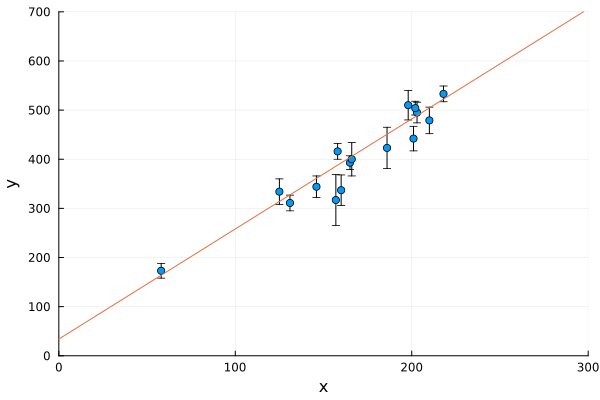

In [4]:
using CSV
using Plots

csv_reader = CSV.File("data.csv")
data = zeros(Float64, 20, 6)

for row in csv_reader
    data[row.id, 1] = row.id
    data[row.id, 2] = row.x
    data[row.id, 3] = row.y
    data[row.id, 4] = row.sigmay
    data[row.id, 5] = row.sigmax
    data[row.id, 6] = row.rho
end

function solvePlot(startID, endID)

# startID = 5
# endID = 20

xdata = Vector{Float64}()
ydata = Vector{Float64}()
errors = Vector{Float64}()

points = endID-startID+1
Y = zeros(Float64, points, 1)
A = zeros(Float64, points, 2)
C = zeros(Float64, points, points)

for i in 1:20
    if data[i,1]>=startID && data[i,1]<=endID
        index = i-startID+1
        Y[index, 1] = data[i, 3]
        A[index, 1] = 1.0
        A[index, 2] = data[i, 2]
        C[index, index] = (data[i, 4])^2

        push!(xdata, data[i, 2])
        push!(ydata, data[i, 3])
        push!(errors, data[i, 4])
    end
end
Atrans = transpose(A)
Cinv = inv(C)
var = inv(Atrans*Cinv*A)
X = var*(Atrans*Cinv*Y)
print(X)
print(var)
wholeX = range(0,300,step=1)
fittedY = @. X[2,1]*wholeX + X[1,1]
plot(xdata, ydata,yerr = errors, seriestype=:scatter, label = "data", legend=false)
plot!(wholeX, fittedY, label = "Least Square Fit")
xlims!(0, 300)
ylims!(0, 700)
xlabel!("x")
ylabel!("y")
end
solvePlot(5,20)

[213.27349197596027; 1.0767475241683262;;][207.18818909008178 -1.0542720591964463; -1.0542720591964463 0.005991810080070381]

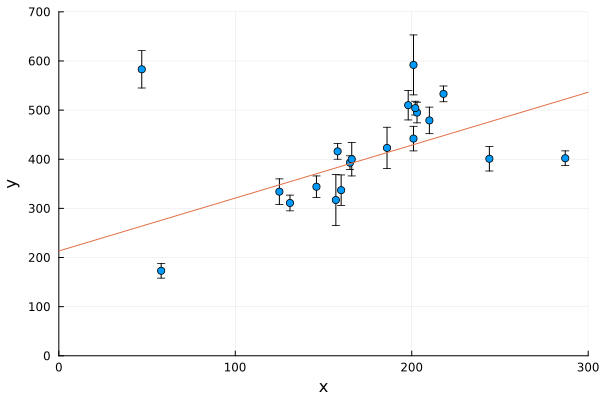

In [5]:
solvePlot(1,20)

[72.89462647167076; 1.5960504522747037; 0.002298888408121175;;]

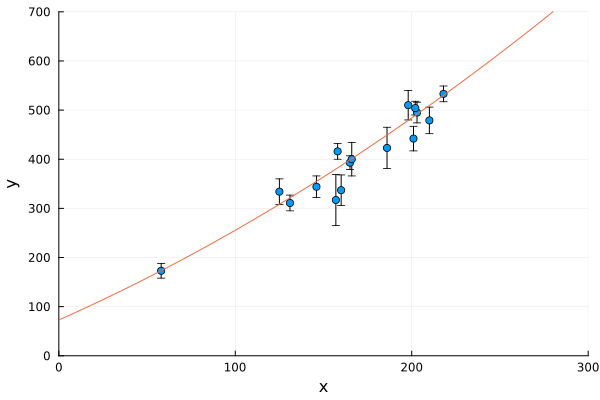

In [10]:
startID=5
endID=20
xdata = Vector{Float64}()
ydata = Vector{Float64}()
errors = Vector{Float64}()

points = endID-startID+1
Y = zeros(Float64, points, 1)
A = zeros(Float64, points, 3)
C = zeros(Float64, points, points)

for i in 1:20
    if data[i,1]>=startID && data[i,1]<=endID
        index = i-startID+1
        Y[index, 1] = data[i, 3]
        A[index, 1] = 1.0
        A[index, 2] = data[i, 2]
        A[index, 3] = data[i, 2]^2
        C[index, index] = (data[i, 4])^2

        push!(xdata, data[i, 2])
        push!(ydata, data[i, 3])
        push!(errors, data[i, 4])
    end
end
Atrans = transpose(A)
Cinv = inv(C)
var = inv(Atrans*Cinv*A)
X = var*(Atrans*Cinv*Y)
print(X)
# print(var)

wholeX = range(0,300,step=1)
fittedY = @. X[3,1]*(wholeX^2) + X[2,1]*wholeX + X[1,1]
plot(xdata, ydata,yerr = errors, seriestype=:scatter, label = "data", legend=false)
plot!(wholeX, fittedY, label = "Least Square Fit")
xlims!(0, 300)
ylims!(0, 700)
xlabel!("x")
ylabel!("y")

# Exercise 4
$$p(t_i|\sigma_{ti},T) = \frac{1}{\sqrt{2\pi \sigma_{ti}^2}}\text{exp}\bigg(-\frac{(t_i-T)^2}{2\sigma_{ti}^2}\bigg)$$

The likelihood is the product of conditional probablities-
$$\mathcal{L} = \prod^N_{i=1}p(t_i|\sigma_{ti},T)$$

Taking Logarithm both sides, we get-
$$\text{ln}\ \mathcal{L} = \sum_{i=1}^N\Bigg[\text{ln}\bigg(\frac{1}{2\pi\sigma_{ti}^2}\bigg) + \bigg(-\frac{(t_i-T)^2}{2\sigma_{ti}^2}\bigg)\Bigg]$$
This is since the product will open as a summation under the log and we can separate the two terms inside and add them.

Now, the first term is constant for a given $\sigma_{ti}$, so it can be written as a constant $K$
$$\implies \text{ln}\ \mathcal{L} = K-\sum_{i=1}^N\bigg(\frac{(t_i-T)^2}{2\sigma_{ti}^2}\bigg)$$

The likelihood maximizes when the derivative of $\mathcal{L}$ wrt $T$ is zero. Also, $\text{ln}\mathcal{L}$ maximizes when $\mathcal{L}$ maximizes. So we need to find $T$ such that
$$\frac{\partial (\text{ln}\ \mathcal{L})}{\partial T} = 0$$
Now,
$$\begin{align*}
\frac{\partial (\text{ln}\ \mathcal{L})}{\partial T} &= -\sum_{i=1}^N\frac{\partial}{\partial T}\bigg(\frac{(t_i-T)^2}{2\sigma_{ti}^2}\bigg)\\
&= \sum_{i=1}^N\bigg(\frac{(t_i-T)}{\sigma_{ti}^2}\bigg)\\
&=\sum_{i=1}^N\frac{t_i}{\sigma_{ti}^2} - \sum_{i=1}^N\frac{T}{\sigma_{ti}^2}
\end{align*}$$
for maximizing the likelihood,
$$\begin{align*}
\sum_{i=1}^N\frac{t_i}{\sigma_{ti}^2} - \sum_{i=1}^N\frac{T}{\sigma_{ti}^2} &= 0\\
\implies T\sum^N_{i=1}\frac{1}{\sigma_{ti}^2} &= \sum_{i=1}^N\frac{t_i}{\sigma_{ti}^2}\\
\implies T &=\frac{ \sum_{i=1}^N\frac{t_i}{\sigma_{ti}^2}}{\sum^N_{i=1}\frac{1}{\sigma_{ti}^2}}
\end{align*}$$

This is just the weighted mean of $t_i$

# Exercise 5
We have
$$\chi^2 = [Y - AX]^TC^{-1}[Y-AX]$$
For maximizing this, $\frac{\partial \chi^2}{\partial X} = 0 $
